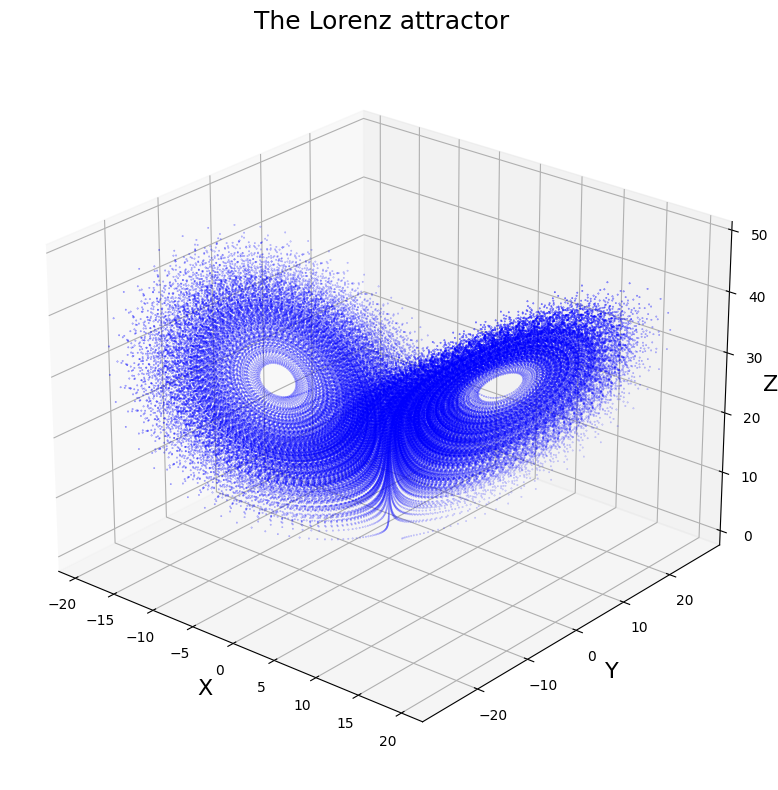

In [52]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the Lorenz system function
def lorenz_system(t, y, sigma, rho, beta):
    x, y, z = y
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

# Set the Lorenz system parameters
sigma = 10
rho = 28
beta = 8/3

# Set the initial conditions
y0 = [1, 1, 1]

# Set the time range for simulation
t_start = 0
t_end = 800
num_points = 80000
t = np.linspace(t_start, t_end, num_points)

# Solve the Lorenz system using the Runge-Kutta method
sol = solve_ivp(lorenz_system, [t_start, t_end], y0, t_eval=t, args=(sigma, rho, beta))

# Plot the results
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(sol.y[0], sol.y[1], sol.y[2], s=0.08, c='b')
ax.set_xlabel('X',fontsize=16)
ax.set_ylabel('Y',fontsize=16)
ax.set_zlabel('Z',fontsize=16)
ax.set_title('The Lorenz attractor',fontsize=18)
ax.zaxis.labelpad=-2
ax.view_init(25,-50)
plt.tight_layout()
#plt.jet()
plt.savefig("N:/atm_glomod/user/jomuel001/Dokumente/MasterThesis/figures/sample/Lorenzattractor_noforce.png",dpi=300)
plt.show()



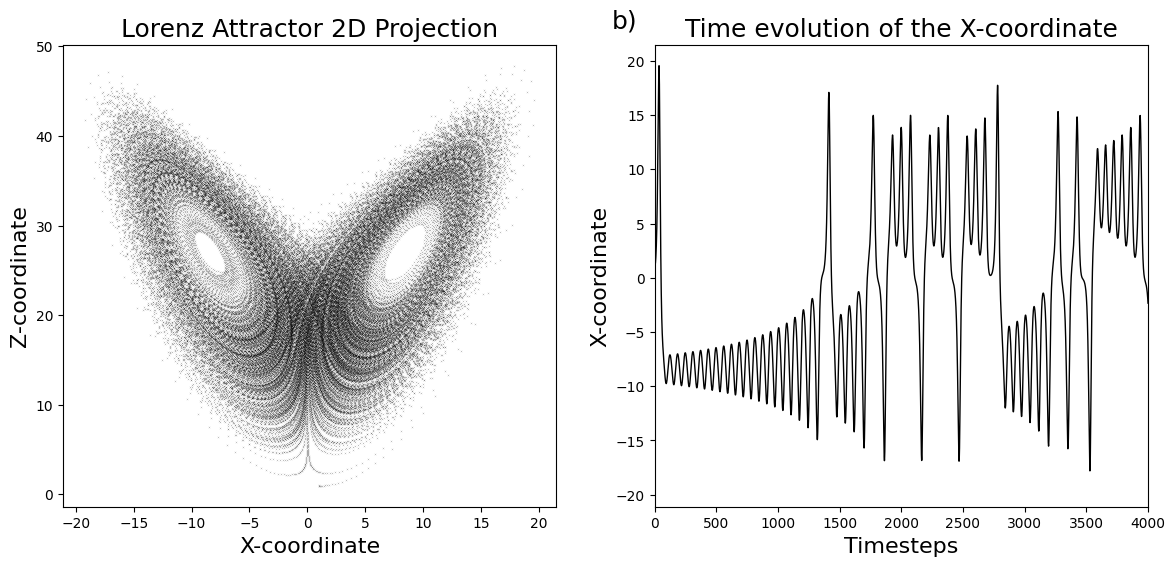

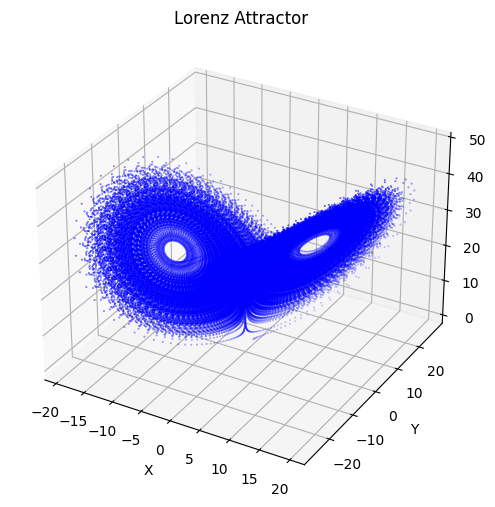

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def lorenz(x, t, sigma, rho, beta, F_ext_x, F_ext_y):
    """The Lorenz system of differential equations."""
    dx_dt = sigma * (x[1] - x[0]) + F_ext_x
    dy_dt = x[0] * (rho - x[2]) - x[1] + F_ext_y
    dz_dt = x[0] * x[1] - beta * x[2] 
    return [dx_dt, dy_dt, dz_dt]

# Set the initial conditions and constants
x0 = [1,1,1]
#temperature rise since it is similar to co2 rise
T0 = 13.9+273.15
alpha= 4e-2
F_ext_x = 0*np.cos(180*2*np.pi/360)
F_ext_y = 0*np.sin(180*2*np.pi/360)

sigma, rho, beta, F_ext_x = 10.0, 28.0, 8/3, F_ext_x

# Set the time grid
t_start, t_end, dt = 0.0, 800.0, 0.01
t = np.arange(t_start, t_end, dt)
# Solve the ODE using scipy.integrate.odeint
sol = odeint(lorenz, x0, t, args=(sigma, rho, beta, F_ext_x, F_ext_y))

# Create a figure with a 2x2 grid of subplots
x = sol[:, 0]
y = sol[:, 1]
z = sol[:, 2]
t_1=7112
t_2=t_1+10
t_3=2295 #ok
t_4=t_3+10
t_5=3650 #ok
t_6=t_5+10
fig, axs = plt.subplots(1,2,figsize=(14,6), gridspec_kw={'width_ratios': [1, 1]})
#ax4 = fig.add_subplot(2, 2, 4)
# The first subplot (top-left)
axs[0].scatter(x, z, color='k',marker='x', s=0.01,alpha=0.5)
##axs[0].scatter(x[t_1:t_2], z[t_1:t_2], color='red',marker='o', s=3, label="initial ensemble") #initial
##axs[0].scatter(x[t_3:t_4], z[t_3:t_4], color='red',marker='o', s=3) #initial
##axs[0].scatter(x[t_5:t_6], z[t_5:t_6], color='red',marker='o', s=3) #inital

t_z1=100
##axs[0].scatter(x[t_1+t_z1:t_2+t_z1], z[t_1+t_z1:t_2+t_z1], color='c',marker='o', s=3, label="ensemble (t=100)") #t1
##axs[0].scatter(x[t_3+t_z1:t_4+t_z1], z[t_3+t_z1:t_4+t_z1], color='c',marker='o', s=3) #t1
##axs[0].scatter(x[t_5+t_z1:t_6+t_z1], z[t_5+t_z1:t_6+t_z1], color='c',marker='o', s=3)

t_z1=500
##axs[0].scatter(x[t_1+t_z1:t_2+t_z1], z[t_1+t_z1:t_2+t_z1], color='b',marker='o', s=3, label="ensemble (t=500)") #t1
##axs[0].scatter(x[t_1-195+t_z1:t_2-195+t_z1], z[t_1-195+t_z1:t_2-195+t_z1], color='b',marker='o', s=3) #t1
##axs[0].scatter(x[t_1+195+t_z1:t_2+195+t_z1], z[t_1+195+t_z1:t_2+195+t_z1], color='b',marker='o', s=3)#t1
#axs[0].scatter(y, z, color='blue',marker='x', s=0.01)
axs[0].set_xlabel('X-coordinate',fontsize=16)
axs[0].set_ylabel('Z-coordinate',fontsize=16)
axs[0].set_title('Lorenz Attractor 2D Projection',fontsize=18)
##red_patch = mpatches.Patch(color='r', label='initial ensemble')
##cyan_patch = mpatches.Patch(color='c', label='ensemble (t=100)')
##blue_patch = mpatches.Patch(color='b', label='ensemble (t=500)')
#axs[0].legend(handles=[red_patch, cyan_patch, blue_patch])
#axs[0].legend(fontsize=16)
#axs[0].text(-25, 53, "a)",fontsize=18)
#axs[0].set_xlim(-30,30)
#hist, edges = np.histogram(x, bins=100, density=True)
# Plot the histogram of the x-coordinate values
# axs[1].plot(edges[:-1], hist, color='red')
# #hist, edges = np.histogram(y, bins=100, density=True)
# # Plot the histogram of the x-coordinate values
# #axs[1].plot(edges[:-1], hist, color='blue')
# axs[1].set_xlabel('X')
# axs[1].set_ylabel('Density')
# axs[1].set_title('Density of Lorenz Attractor Projection onto Y-axis')
#axs[1].set_xlim(-30,30)

# Plot the z-coordinate values of the solution trajectory on the bottom-left subplot


# Add some horizontal space between the subplots
#fig.subplots_adjust(wspace=0.4)
#fig.subplots_adjust(hspace=0.4)
# Plot a 2D projection of the solution trajectory on the bottom-right subplot

# Display the plots
#plt.show()
#fig = plt.figure(figsize=(8, 6))
#axs[1] = fig.add_subplot(111)
#axs[1].plot(t*100,z, linewidth=1, c='blue')
axs[1].plot(t*100,x, linewidth=1, c='black')
axs[1].set_xlabel('Timesteps',fontsize=16)
axs[1].set_xlim(0,4000)
axs[1].set_ylabel('X-coordinate',fontsize=16)
axs[1].set_title('Time evolution of the X-coordinate',fontsize=18)
axs[1].text(-350, 23, "b)",fontsize=18)
plt.savefig("N:/atm_glomod/user/jomuel001/Dokumente/MasterThesis/figures/sample/Lorenzprojection2D.png",dpi=300)
plt.show()



fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, s=0.1, c='blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()


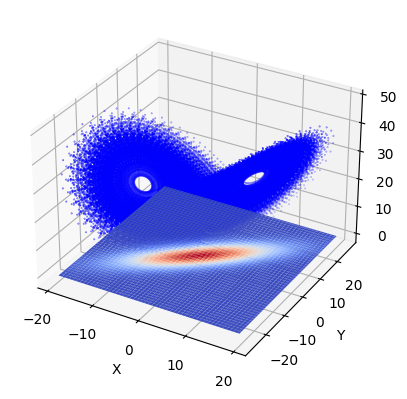

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
from scipy.stats import multivariate_normal

# Define the Lorenz equations

def lorenz(t, x, sigma=10, rho=28, beta=8/3):
    """The Lorenz system of differential equations."""
    dx_dt = sigma * (x[1] - x[0]) + F_ext_x
    dy_dt = x[0] * (rho - x[2]) - x[1] + F_ext_y
    dz_dt = x[0] * x[1] - beta * x[2] 
    return [dx_dt, dy_dt, dz_dt]
t_start=0.0
dt=0.01
t_end=800.0
# Define the parameters and initial conditions
sigma = 10
rho = 28
beta = 8/3
F_ext_x = 0*np.cos(180*2*np.pi/360)
F_ext_y = 0*np.sin(180*2*np.pi/360)
x0, y0, z0 = [1, 1, 1]
t_span = [0, t_end]
t_eval = np.arange(t_start, t_end, dt)

# Solve the Lorenz system
sol = solve_ivp(lorenz, t_span, [x0, y0, z0], t_eval=t_eval)

# Extract the X and Y coordinates from the solution
X = sol.y[0]
Y = sol.y[1]

# Create a meshgrid of X and Y values
X_range = np.linspace(np.min(X), np.max(X), 100)
Y_range = np.linspace(np.min(Y), np.max(Y), 100)
X_mesh, Y_mesh = np.meshgrid(X_range, Y_range)

# Calculate the density function for the X-Y coordinates
pos = np.empty(X_mesh.shape + (2,))
pos[:, :, 0] = X_mesh
pos[:, :, 1] = Y_mesh
rv = multivariate_normal(mean=[np.mean(X), np.mean(Y)], cov=np.cov(X, Y))
density = rv.pdf(pos)

# Create a 3D plot of the density function
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_mesh, Y_mesh, density, cmap='coolwarm',zorder=5)
scatter_plot= ax.scatter(X, Y, sol.y[2]+0, color='blue',s=0.1,zorder=20)
#ax.plot(X[0], Y[0], sol.y[2][0], marker='o', color='red', markersize=0.1)
#ax.plot(X[-1], Y[-1], sol.y[2][-1], marker='o', color='green', markersize=0.1)
scatter_plot.set_zorder(25)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
plt.show()



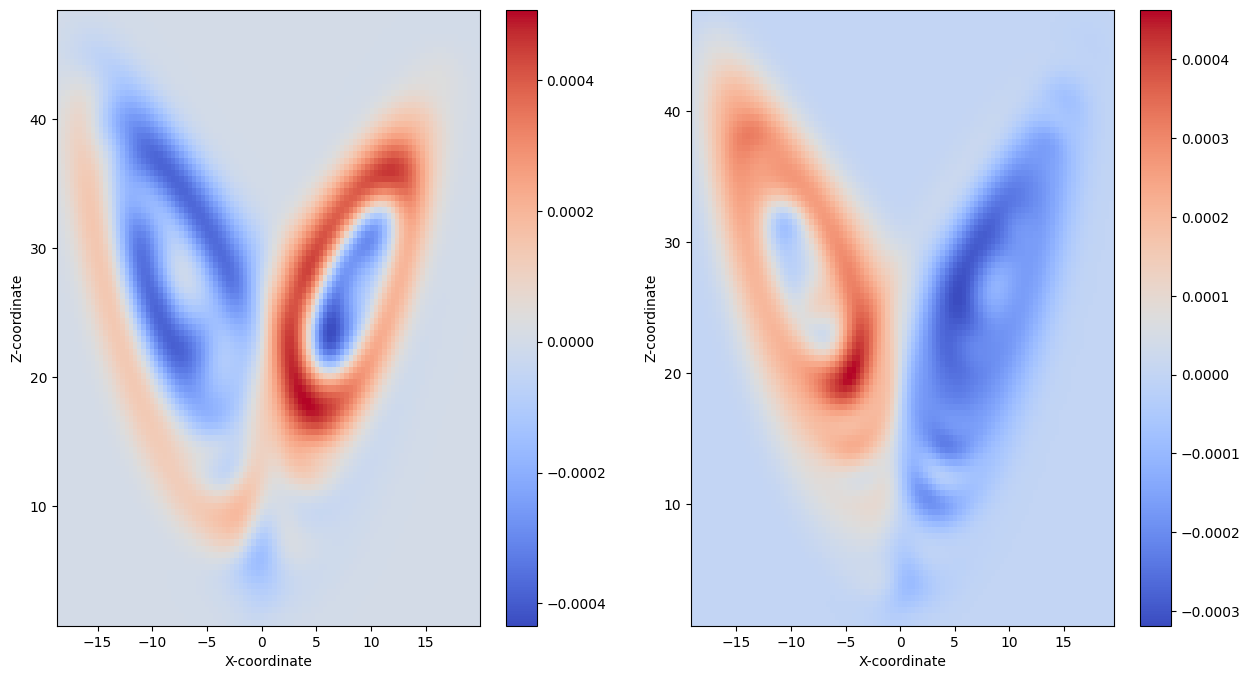

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.stats import gaussian_kde

# Define the Lorenz system
def lorenz(t, xyz, sigma=10, rho=28, beta=8/3):
    x, y, z = xyz
    dxdt = sigma * (y - x) 
    dydt = x * (rho - z) - y 
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]
def lorenz_force(t, xyz, sigma=10, rho=28, beta=8/3):
    x, y, z = xyz
    dxdt = sigma * (y - x) + 2.5*np.cos(50*2*np.pi/360)
    dydt = x * (rho - z) - y + 2.5*np.sin(50*2*np.pi/360)
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

def lorenz_2(t, xyz, sigma=10, rho=28, beta=8/3):
    x, y, z = xyz
    dxdt = sigma * (y - x) + 2.5*np.cos(230*2*np.pi/360)
    dydt = x * (rho - z) - y + 2.5*np.sin(230*2*np.pi/360)
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Solve the Lorenz system
t_span = [0, 800]
xyz0 = [1,1,1]
sol = solve_ivp(lorenz, t_span, xyz0, t_eval=np.arange(0, 800, 0.01))
sol_force = solve_ivp(lorenz_force, t_span, xyz0, t_eval=np.arange(0, 800, 0.01))
sol_2 = solve_ivp(lorenz_2, t_span, xyz0, t_eval=np.arange(0, 800, 0.01))

# Extract the X and Z coordinates
X = sol.y[0]
Y= sol.y[1]
Z = sol.y[2]
X_force = sol_force.y[0]
Y_force= sol_force.y[1]
Z_force = sol_force.y[2]
X_2 = sol_2.y[0]
Y_2= sol_2.y[1]
Z_2 = sol_2.y[2]

# Create a 2D density plot
fig, axs = plt.subplots(ncols=2, figsize=(15, 8), gridspec_kw={'width_ratios': [2, 2]})

# Calculate the density function
kde = gaussian_kde([X, Z])
xi, zi = np.mgrid[X.min():X.max():100j, Z.min():Z.max():100j]
density = kde(np.vstack([xi.flatten(), zi.flatten()]))

kde_force = gaussian_kde([X_force, Z_force])
xi_force, zi_force = np.mgrid[X_force.min():X_force.max():100j, Z_force.min():Z_force.max():100j]
density_force = kde_force(np.vstack([xi_force.flatten(), zi_force.flatten()]))

density_diff = density_force-density

kde_2 = gaussian_kde([X_2, Z_2])
xi_2, zi_2 = np.mgrid[X_2.min():X_2.max():100j, Z_2.min():Z_2.max():100j]
density_2 = kde_2(np.vstack([xi_2.flatten(), zi_2.flatten()]))
density_diff2 = density_2-density
# Plot the density function
axs[0].pcolormesh(xi_force, zi_force, density_diff.reshape(xi.shape), cmap='coolwarm', shading='auto')

# Set the axis labels
axs[0].set_xlabel('X-coordinate')
axs[0].set_ylabel('Z-coordinate')

axs[1].pcolormesh(xi_2, zi_2, density_diff2.reshape(xi.shape), cmap='coolwarm', shading='auto')
axs[1].set_xlabel('X-coordinate')
axs[1].set_ylabel('Z-coordinate')
fig.colorbar(axs[1].collections[0], ax=axs[1])
fig.colorbar(axs[0].collections[0], ax=axs[0])
# Show the plot
plt.show()


In [86]:
sol_2

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  8.000e+02  8.000e+02]
        y: [[ 1.000e+00  9.474e-01 ... -8.806e+00 -8.777e+00]
            [ 1.000e+00  1.175e+00 ... -7.863e+00 -7.853e+00]
            [ 1.000e+00  9.841e-01 ...  2.811e+01  2.805e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 33986
     njev: 0
      nlu: 0

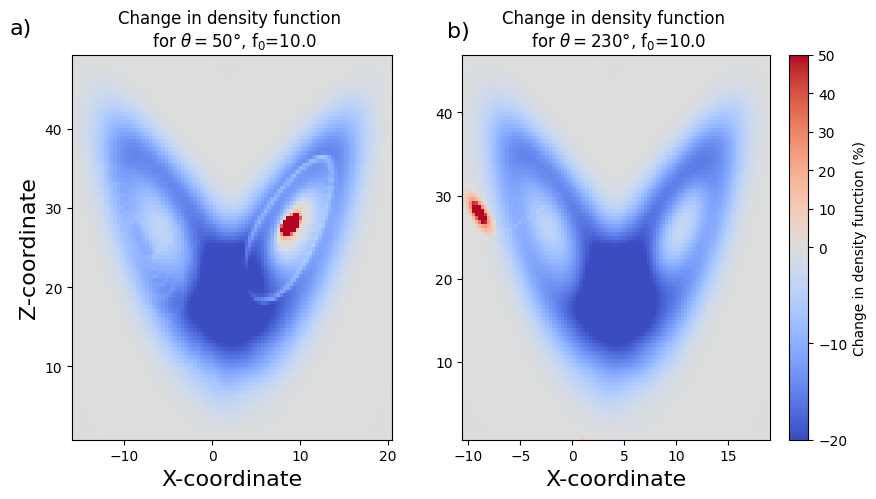

In [85]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 1.2]})
#density_diff2=density_diff2*100
#density_diff=density_diff*100
divnorm = colors.TwoSlopeNorm(vmin=-20, vcenter=0, vmax=50)
axs[0].pcolormesh(xi_force, zi_force, density_diff.reshape(xi.shape), cmap='coolwarm', shading='auto',norm = divnorm)
axs[1].pcolormesh(xi_2, zi_2, density_diff2.reshape(xi.shape), cmap='coolwarm', shading='auto',norm=divnorm)
# Set the axis labels
axs[0].set_xlabel('X-coordinate',fontsize=16)
axs[0].set_ylabel('Z-coordinate',fontsize=16)
axs[0].set_title(f"Change in density function \n for" r" $\theta=50°$, f$_0$=10.0")
axs[0].text(-23, 52,"a)", fontsize=16)
#axs[1].pcolormesh(xi, zi, density_diff2.reshape(xi.shape), cmap='coolwarm', shading='auto', vmin=-100, vmax=100)
axs[1].set_xlabel('X-coordinate',fontsize=16)
axs[1].set_title(f"Change in density function \n for" r" $\theta=230°$, f$_0$=10.0")
axs[1].text(-12, 49,"b)", fontsize=16)
#axs[1].set_xlim(-11,16)
#axs[0].set_xlim(-11,16)
#axs[1].set_ylabel('Z-coordinate',fontsize=16)

fig.colorbar(axs[1].collections[0], ax=axs[1],label="Change in density function (%)")
#fig.colorbar.set_ticks(np.linspace(0, 0.06, 4))
#fig.colorbar.set_ticklabels(['0%', '25%', '50%', '75%'])
#fig.colorbar(axs[0].collections[0], ax=axs[0])
# Show the plot
plt.savefig("N:/atm_glomod/user/jomuel001/Dokumente/MasterThesis/figures/sample/DensityLorenz_f0variation.png",dpi=300)
plt.show()

4.652899236823763


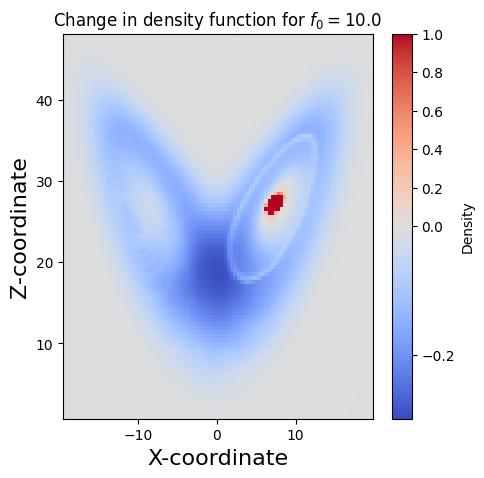

In [52]:
fig, axs = plt.subplots(ncols=1, figsize=(5, 5))
#density_diff2=density_diff2/100
#density_diff=density_diff/100
#axs[0].pcolormesh(xi_force, zi_force, density_diff.reshape(xi.shape), cmap='coolwarm', shading='auto')
import matplotlib.colors as colors
# Set the axis labels
axs.set_xlabel('X-coordinate',fontsize=16)
axs.set_ylabel('Z-coordinate',fontsize=16)
axs.set_title(r"Change in density function for $f_0=10.0$")
#axs.text(-23, 50,"a)", fontsize=16)
vmin=-0.3
vmax=1
midpoint=0
#norm = DivergingNorm(vmin=vmin, vcenter=midpoint, vmax=vmax)
divnorm = colors.TwoSlopeNorm(vmin=-0.3, vcenter=0, vmax=1)
mesh = axs.pcolormesh(xi, zi, density_diff.reshape(xi.shape), cmap='coolwarm', shading='auto',norm=divnorm)
cbar = fig.colorbar(mesh, ax=axs, label='Density')
#cbar.set_ticks([vmin, 0, vmax])
#cbar.set_ticklabels([f'{vmin:.0f}', '0', f'{vmax:.0f}'])
print(np.sum(np.sum(density_diff.reshape(xi.shape)*(zi[0,1]-zi[0,0]), axis=1)*(xi[1,0]-xi[0,0])))
#axs[1].set_xlabel('X-coordinate',fontsize=16)
#axs[1].set_title(r"Change in density function for $f_0=10.0$")
#axs[1].text(-24, 49,"b)", fontsize=16)
#axs[1].set_ylabel('Z-coordinate',fontsize=16)

#fig.colorbar(axs.collections[0], ax=axs,label="Change in density function (%)")
#fig.colorbar.set_ticks(np.linspace(0, 0.06, 4))
#fig.colorbar.set_ticklabels(['0%', '25%', '50%', '75%'])
#fig.colorbar(axs[0].collections[0], ax=axs[0])
# Show the plot
#plt.savefig("N:/atm_glomod/user/jomuel001/Dokumente/MasterThesis/figures/sample/DensityLorenz_f0variation.png",dpi=300)
plt.show()

In [47]:
from scipy import integrate
integral = integrate.simps(integrate.simps(density_diff2.reshape(xi.shape), xi), zi)
print(integral)

ValueError: If given, shape of x must be 1-D or the same as y.

C:\Users\jomuel001\AppData\Local\Temp\ipykernel_14988\2360210263.py:14: MatplotlibDeprecationWarning: The execute_constrained_layout function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use figure.get_layout_engine().execute() instead.
  fig.execute_constrained_layout()
C:\Users\jomuel001\AppData\Local\Temp\ipykernel_14988\2360210263.py:64: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(hspace=0.5)


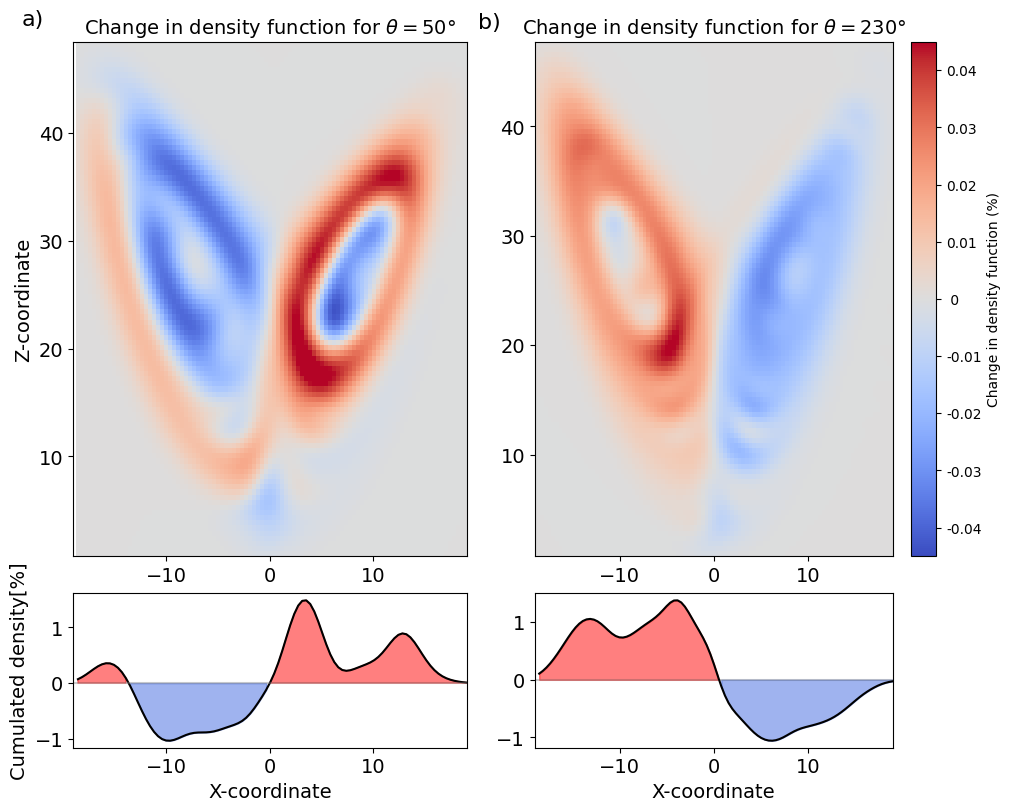

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Your existing code...

# Create the figure and axes
#fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(11, 9), gridspec_kw={'width_ratios': [1, 1.2], 'height_ratios': [5, 1], 'hspace':0.3})
fig = plt.figure(figsize=(10, 8), constrained_layout=True)
gs = fig.add_gridspec(2, 2, width_ratios=[1.1, 1], height_ratios=[5, 1.5])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0], sharex = ax1)
ax4 = fig.add_subplot(gs[1, 1], sharex = ax2)
fig.execute_constrained_layout()
# Your existing code...

# Plot the first pcolormesh
im1 = ax1.pcolormesh(xi_force, zi_force, 100*density_diff.reshape(xi.shape), cmap='coolwarm', shading='auto', vmax=0.045, vmin=-0.045)
ax1.set_xlim(-19,19)
ax1.tick_params(axis='both', labelsize=14)
# Plot the second pcolormesh
im2 = ax2.pcolormesh(xi_2, zi_2, 100*density_diff2.reshape(xi.shape), cmap='coolwarm', shading='auto',vmax=0.045, vmin=-0.045)
ax2.set_xlim(-19,19)
ax2.tick_params(axis='both', labelsize=14)
# Compute the integrated density function for each plot
cdf1 = np.sum(100*density_diff.reshape(xi.shape), axis=1)
cdf2 = np.sum(100*density_diff2.reshape(xi.shape), axis=1)

# Plot the integrated density function for the first plot
ax3.plot(xi_force[:,0], cdf1, color='black')
ax3.fill_between(xi_force[:,0], cdf1, where=(cdf1 >= 0), color='red', alpha=0.5)
ax3.fill_between(xi_force[:,0],cdf1, where=(cdf1 <= 0), color='royalblue',alpha=0.5)
ax3.tick_params(axis='both', labelsize=14)
ax3.set_xlabel('X-coordinate', fontsize=14)
ax3.set_ylabel('Cumulated density[%]', fontsize=14)
ax3.set_xlim(-19,19)
ax3.hlines(0,-20,20,color='grey',alpha=0.4)
ax4.hlines(0,-20,20,color='grey',alpha=0.4)
# Plot the integrated density function for the second plot
ax4.plot(xi_force[:,0], cdf2, color='black')

ax4.fill_between(xi_force[:,0], cdf2, where=(cdf2 >= 0), color='red', alpha=0.5)
ax4.fill_between(xi_force[:,0],cdf2, where=(cdf2 <= 0), color='royalblue',alpha=0.5)
#ax4.sharex(axs[1, 0])
ax4.set_xlabel('X-coordinate',fontsize=14)
ax4.tick_params(axis='both', labelsize=14)
#axs[1, 1].set_ylabel('Integrated Density', fontsize=12)
#axs[1, 1].set_xlim(-19,19)
# Set the axis labels for the pcolormesh plots
#ax1.set_xlabel('X-coordinate', fontsize=14)
ax1.set_ylabel('Z-coordinate', fontsize=14)
ax1.set_title(r"Change in density function for $\theta=50°$", fontsize=14)
ax1.text(-24, 50, "a)", fontsize=16)

#ax2.set_xlabel('X-coordinate', fontsize=14)
ax2.set_title(r"Change in density function for $\theta=230°$", fontsize=14)
ax2.text(-25, 49, "b)", fontsize=16)
#fig.subplots_adjust(wspace=0.1)
# Create colorbars for pcolormesh plots
#cbar1 = fig.colorbar(axs[0, 0].collections[0], ax=axs[0, 0], label="Change in density function (%)")
cbar = fig.colorbar(im2, ax=ax2, label="Change in density function (%)",format = '%2.6g', orientation='vertical')
#cbar2 = fig.colorbar(axs[0, 1].collections[0], ax=axs[0, :], label="Change in density function (%)")
# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.5)
plt.savefig("N:/atm_glomod/user/jomuel001/Dokumente/MasterThesis/figures/sample/DensityLorenz.png",dpi=300)
# Show the plot
plt.show()
